#--------------------------#
#1. Contour plot and 2. Heatmap
#--------------------------#

Please download the file Homework_sampledata1.txt from here (it is the same file from last week):

https://drive.google.com/file/d/1rjfXnAh_LT0zwidF40UTM8bP9_7BAI9O/view?usp=sharing

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2008.

**Draw the contour and heatmap of temperature in 2008**

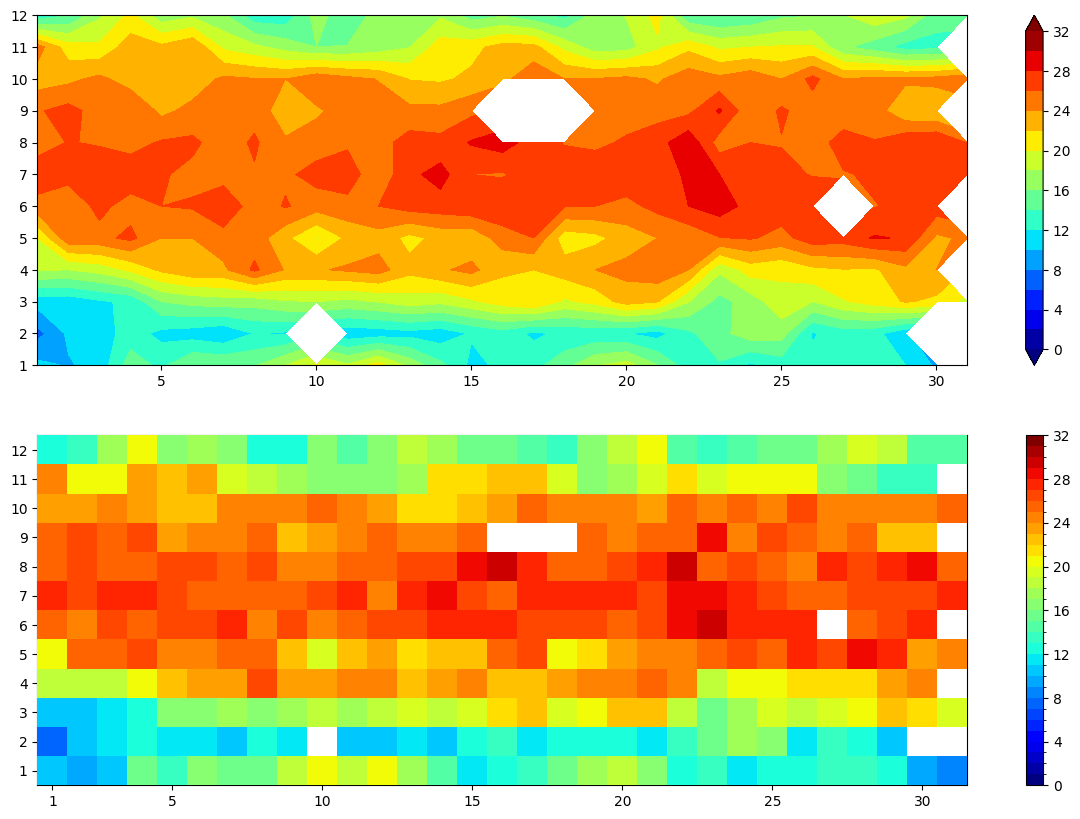

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from math import pi
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_fwf('/content/drive/MyDrive/Data Visualization/Homework_sampledata1.txt', sep = '\s+')
df = df.set_index('2008')
months = [date(2008,m,1).strftime('%b') for m in range(1,13)]
df.columns = months
df = df.replace(-99.0, np.nan)

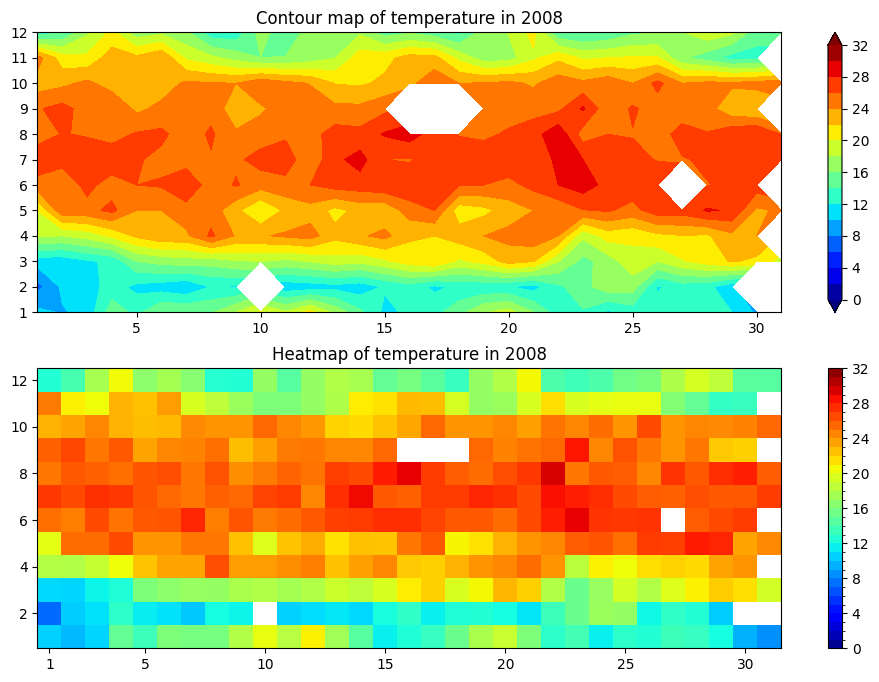

In [ ]:
#--------------------------#
#1. Contour plot and 2. Heatmap
#--------------------------#
x = np.arange(1,13)
y = np.arange(1,32)
x_axis, y_axis = np.meshgrid(y,x)

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(2,1,1)
plt.contourf(x_axis,y_axis,df.T,cmap='jet',vmax=32,vmin=0, levels = range(0,33,2), extend = 'both')
plt.colorbar()
plt.title('Contour map of temperature in 2008')
plt.yticks(range(1,13))

ax = fig.add_subplot(2,1,2)
plt.pcolormesh(x_axis,y_axis,df.T, cmap = 'jet',vmax=32,vmin=0 )
cb = plt.colorbar(ticks=range(0,33,4), boundaries = range(0,33))
cb.ax.minorticks_on()
plt.title('Heatmap of temperature in 2008')
plt.xticks([1,5,10,15,20,25,30])

plt.show()

#--------------------------#
#3. Radar chart
#--------------------------#
Let's imagine the data above is a dataset with 12 samples, coresponding to 12 months.
Each sample has 6 features, which is the mean every 5 days.

Feature 1 = mean (day1-day5)

Feature 2 = mean (day6-day10)

Feature 3 = mean (day10-day15)

Feature 4 = mean (day15-day20)

Feature 5 = mean (day20-day25)

Feature 6 = mean (day25-end of months)

**Draw a radar chart for this dataset**

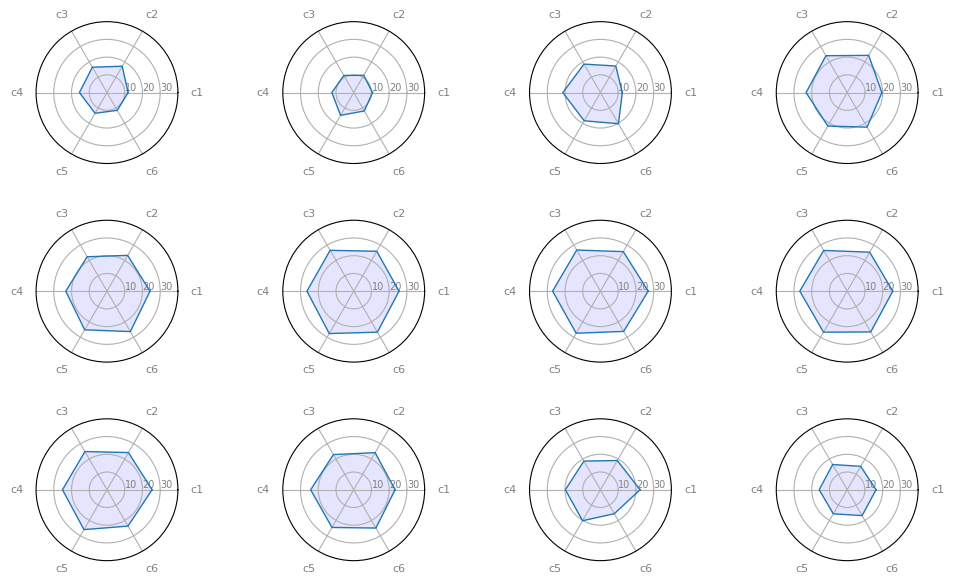

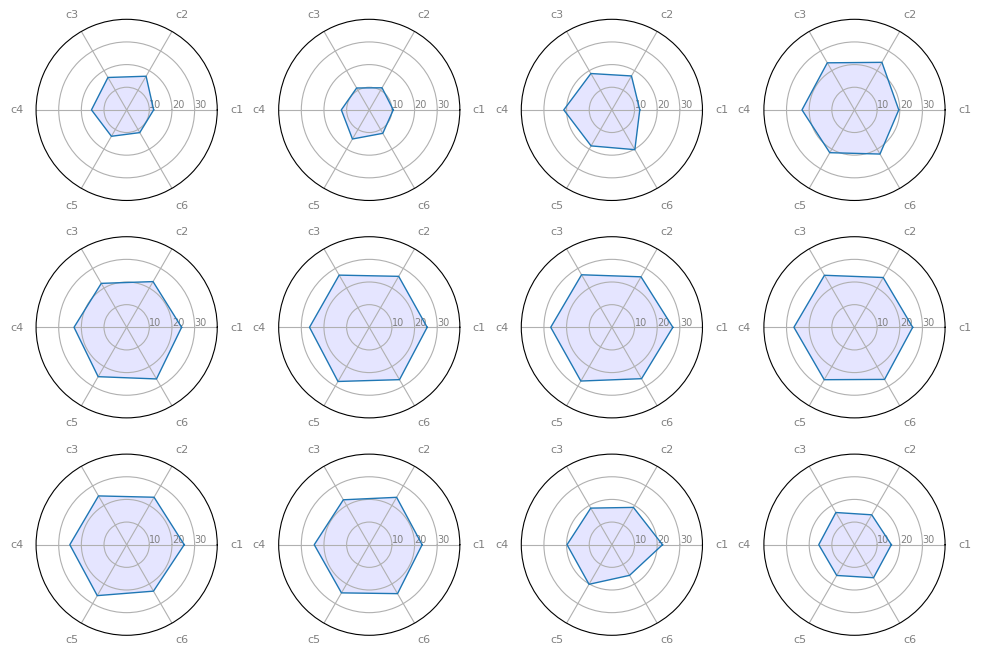

In [ ]:
feature = []
for i in range(len(df.columns)):
    month = df.iloc[0:,i]
    month_feature = []
    month_feature.append(np.nanmean(month[0:5]))
    month_feature.append(np.nanmean(month[5:10]))
    month_feature.append(np.nanmean(month[10:15]))
    month_feature.append(np.nanmean(month[15:20]))
    month_feature.append(np.nanmean(month[20:25]))
    month_feature.append(np.nanmean(month[25:]))
    feature.append(month_feature)
feature = np.array(feature)

no_category = np.size(feature,1)

fig = plt.figure(figsize=(12,8))
for i in range(0,12):
    ax = plt.subplot(3,4, i+1,polar=True)
    angles = [n / float(no_category)*2*pi for n in range(no_category)]
    angles += angles[:1]

    plt.xticks(angles[:-1], ['c1','c2','c3','c4','c5','c6'], color = 'grey', size = 8)

    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ['10','20','30'], color = 'grey', size = 7)
    plt.ylim(0,40)

    plot_df = np.concatenate((feature[i,:], feature[i,:1]))
    ax.plot(angles,plot_df, linewidth=1,linestyle='solid')
    ax.fill(angles,plot_df,'b',alpha=0.1)
plt.show()

#--------------------------#
#4. Dendrogram
#--------------------------#

Now, using the dataset in exercise 3 to draw the dendrogram


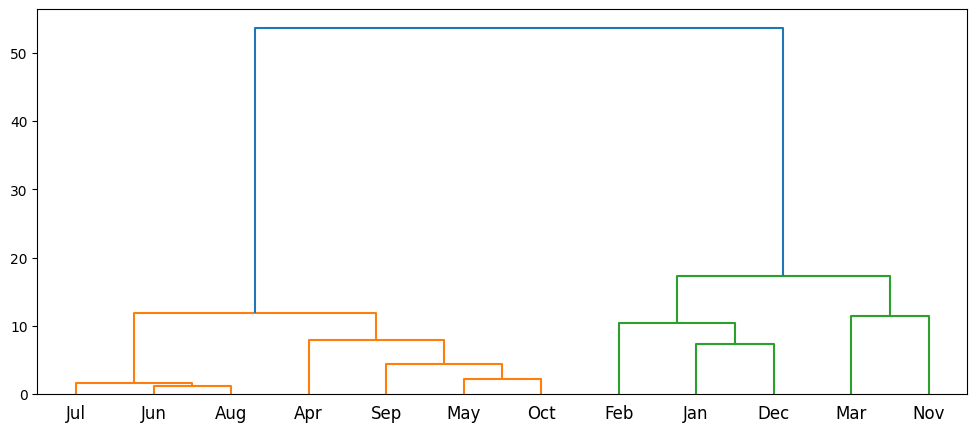


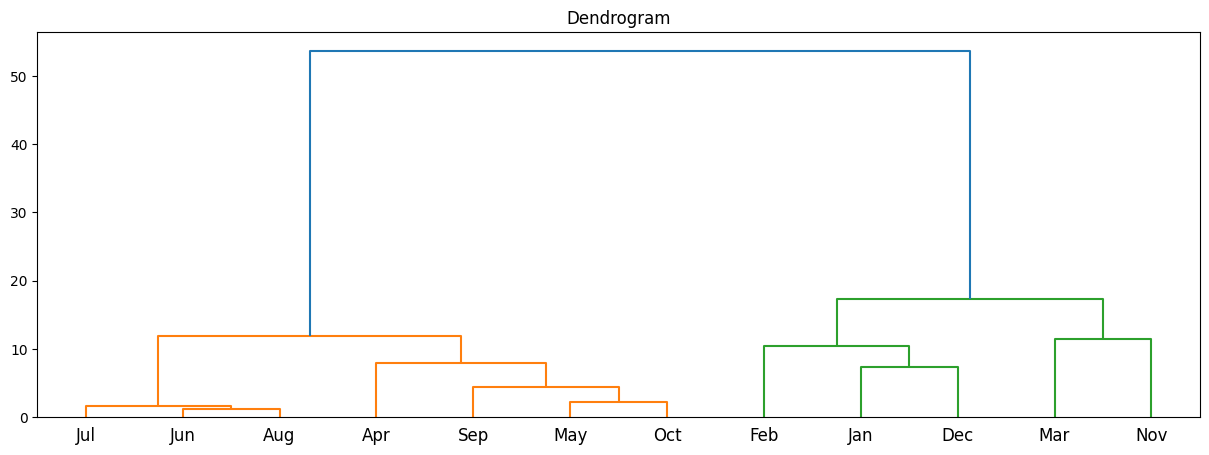

In [ ]:
#--------------------------#
#4. Dendrogram
#--------------------------#
fig = plt.figure(figsize=(15,5))
Z = linkage(feature,'ward')
df = dendrogram(Z,labels = months)
plt.title('Dendrogram')
plt.show()